
## <center>Final Project</center>
### <center>Stefen Angga</center>

**Introduction:**

Sebelum memulai final project ini, saya ingin berterima kasih kepada Lecture dan mantan Lecture *JCAH Data Science & Machine Learning* yaitu Kak Brigita dan Mas Achmad karena sudah membimbing saya selama kurang lebih 5 bulan serta teman-teman yang sudah membantu dan berdiskusi selama masa pembelajaran.


**Apa Tujuan dari Final Project ini ?**

Merupakan langkah pertama saya dalam dunia Data Science. Banyak hal yang akan dilakukan di Final Project ini yang merupakan hasil dari pembelajaran selama kurang lebih 5 bulan di Purwadhika.


**Abstract**

Data ini merupakan kumpulan data yang menjelaskan hasil marketing campaign sebuah bank Portugal.
Campaign ini dilakukan dengan menelfon langsung dan menawarkan client opsi bank untuk menempatkan uangnya di deposito berjangka.
Setelah menjelaskan kepada client, jika client setuju untuk menempatkan uangnya di deposito berjangka, variabel target ditandai dengan *'yes'*, jika tidak *'no'*

*Source data https://archive.ics.uci.edu/ml/datasets/bank+marketing*

*Dataset description https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset*



**Problem Analysis**

Manajemen sebuah bank di portugal menerima laporan bahwa marketing campaign yang dilakukan telemarketer tidak efektif dan membuahkan hasil yang kurang memuaskan. Langkah yang dilakukan bank tsb adalah menganalisa data marketing campaign tsb dan membuat model prediksi dengan tujuan akhir mengefektifkan kinerja telemarketer dan meningkatkan hasil campaign tersebut yaitu client menempatkan uang nya di deposito berjangka. Hal-hal yang akan di analisa sebagai berikut:
1. Apa isi laporan marketing campaign tsb?
2. Apa faktor-faktor demographic yang mempengaruhi keputusan client?
3. Apa faktor-faktor internal bank yang mempengaruhi keputusan client?
4. Apa faktor-faktor eksternal bank yang mempengaruhi keputusan client?
5. Apakah ada kondisi ideal seseorang untuk menempatkan uangnya di deposito berjangka?

## EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv('bank-additional-full.csv', sep= ';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
data.describe(exclude='number')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [6]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
def outlier(col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    below = q1 - 1.5 * iqr
    above = q3 + 1.5 * iqr
    idx_outlier = data[(data[col] > above) | (data[col] < below)].index
    return idx_outlier

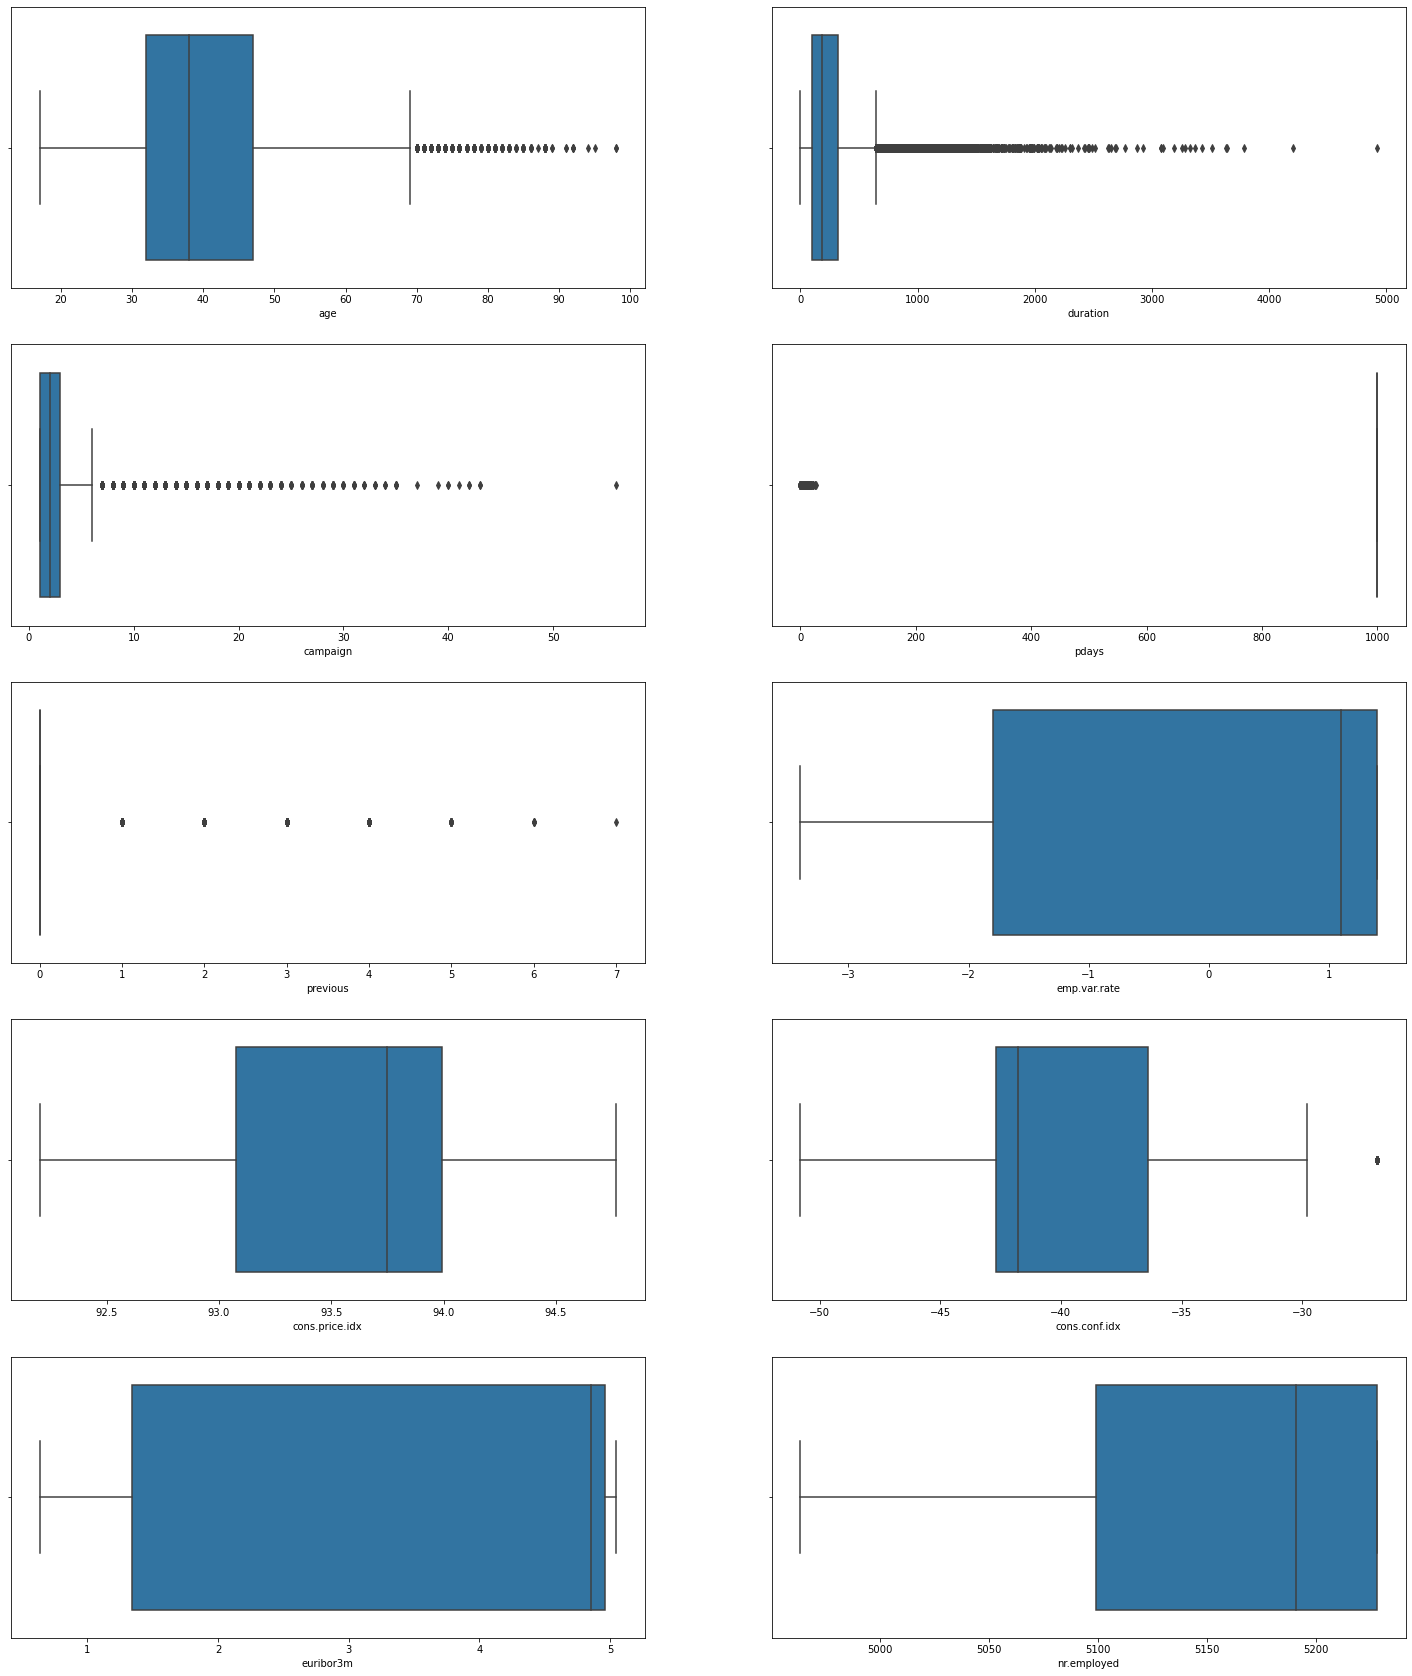

In [8]:
fig, axes= plt.subplots(5,2, figsize=(25,30))
for nf, ax in zip(['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], axes.flatten()):
    sns.boxplot(data[nf],orient='v', ax=ax)

In [9]:
df_outlier= pd.DataFrame(columns=['Column', 'Number of Outliers', 'Outliers pct(%)'])

for i in ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']:
    df_outlier= df_outlier.append({'Column': i, 'Number of Outliers': len(outlier(i)),'Outliers pct(%)': f'{round(len(outlier(i))/len(data)*100,2)} %'}, ignore_index=True)

df_outlier

,Column,Number of Outliers,Outliers pct(%)
0,age,469,1.14 %
1,duration,2963,7.19 %
2,campaign,2406,5.84 %
3,pdays,1515,3.68 %
4,previous,5625,13.66 %
5,emp.var.rate,0,0.0 %
6,cons.price.idx,0,0.0 %
7,cons.conf.idx,447,1.09 %
8,euribor3m,0,0.0 %
9,nr.employed,0,0.0 %


## Feature:

* 1 - age (***numeric***)
* 2 - job : type of job (***categorical***: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital : marital status (***categorical***: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education (***categorical***: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5 - default: has credit in default? (***categorical***: 'no','yes','unknown')
* 6 - housing: has housing loan? (***categorical***: 'no','yes','unknown')
* 7 - loan: has personal loan? (***categorical***: 'no','yes','unknown')

**related with the last contact of the current campaign:**
* 8 - contact: contact communication type (***categorical***: 'cellular','telephone')
* 9 - month: last contact month of year (***categorical***: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: last contact day of the week (***categorical***: 'mon','tue','wed','thu','fri')
* 11 - duration: last contact duration, in seconds (***numeric***). 
>*Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.*

**other attributes:** 
* 12 - campaign: number of contacts performed during this campaign and for this client (***numeric***, includes last contact)
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (***numeric***; 999 means client was not previously contacted)
* 14 - previous: number of contacts performed before this campaign and for this client (***numeric***)
* 15 - poutcome: outcome of the previous marketing campaign (***categorical***: 'failure','nonexistent','success')

**social and economic context attributes:**
* 16 - emp.var.rate: employment variation rate - quarterly indicator (***numeric***)
* 17 - cons.price.idx: consumer price index - monthly indicator (***numeric***)
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (***numeric***)
* 19 - euribor3m: euribor 3 month rate - daily indicator (***numeric***)
* 20 - nr.employed: number of employees - quarterly indicator (***numeric***)

### Output variable (desired target):
* 21 - y - has the client subscribed a term deposit? ('yes','no')

In [10]:
data['pdays']= data['pdays'].replace(999,0)

In [11]:
num_feature= ['duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
cat_feature= ['age','job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

### 1. Apa isi laporan marketing campaign yang tidak efektif tsb?

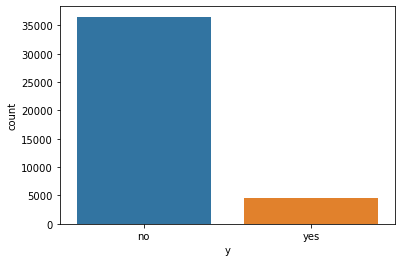

In [15]:
sns.countplot(data['y'])
plt.savefig('Target.jpg')

Data imbalance

In [13]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [14]:
round(data['y'].value_counts()/len(data)*100,2)

no     88.73
yes    11.27
Name: y, dtype: float64

**Isi laporan permasalahan marketing campaign:**

Bahwa dari 41188 client, hanya 4640 client yang menempatkan uang nya di deposito berjangka dengan perbandingan sekitar 1 : 8 atau bisa diartikan dari setiap 1 orang mendepositkan uangnya, maka ada 8 orang lain yang menolak mendepositkan uangnya tersebut. Hal ini menyebabkan kinerja telemarketer menjadi tidak efektif dan membuahkan hasil yang kurang memuaskan.


### 2. Apakah faktor-faktor demographic mempengaruhi keputusan client?

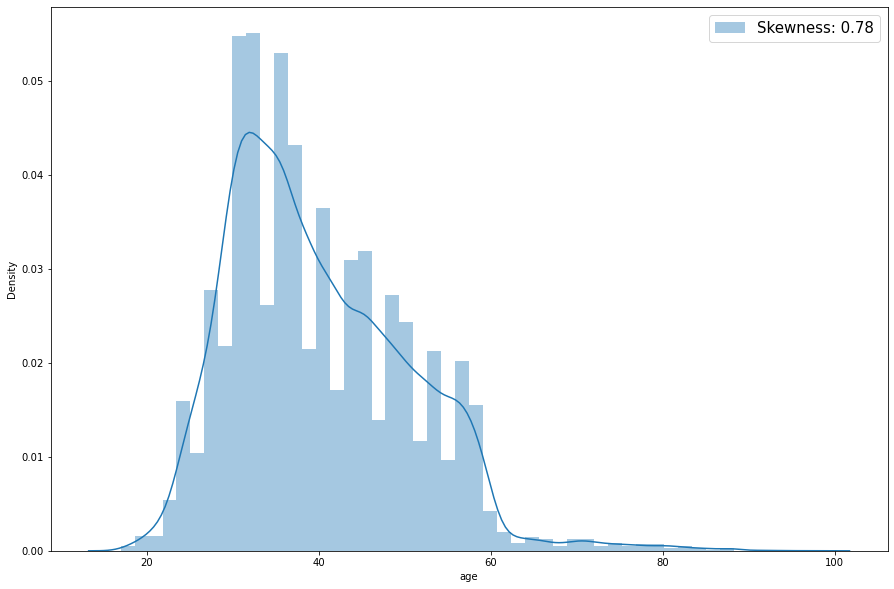

In [16]:
plt.figure(figsize=(15,10))
sns.distplot(data['age'], label = 'Skewness: %.2f'%(data['age'].skew()))
plt.legend(loc = 0, fontsize = 15)

In [17]:
from scipy.stats import kstest

key, pval = kstest(data['age'], 'norm')
pval < 0.05

True

Data age berdistribusi tidak normal, cenderung right skewed dimana nilai mean dan median akan lebih besar di banding modus

**Portugal age structure:**

* 0-14 years: 13.58% (male 716,102/female 682,582)
* 15-24 years: 10.94% (male 580,074/female 547,122)
* 25-54 years: 41.49% (male 2,109,693/female 2,164,745)
* 55-64 years: 13.08% (male 615,925/female 731,334)
* 65 years and over: 20.92% (male 860,198/female 1,294,899) (2020 est.)

**Definition**:
* 0-14 years (children), 
* 15-24 years (early working age), 
* 25-54 years (prime working age), 
* 55-64 years (mature working age), 
* 65 years and over (elderly). 

Struktur usia suatu populasi memengaruhi masalah sosial ekonomi utama suatu negara. Negara dengan populasi muda (persentase tinggi di bawah usia 15) perlu berinvestasi lebih banyak di sekolah, sementara negara dengan populasi yang lebih tua (persentase tinggi usia 65 ke atas) perlu berinvestasi lebih banyak di sektor kesehatan. Struktur usia juga dapat digunakan untuk membantu memprediksi potensi masalah politik. Misalnya, pertumbuhan pesat penduduk dewasa muda yang tidak dapat mendapatkan pekerjaan dapat menyebabkan keresahan.

*source https://www.indexmundi.com/portugal/age_structure.html*

In [18]:
def binning_age(value):
    if value>64:
        result='elderly'
    elif value>54:
        result='mature working age'
    elif value>24:
        result='prime working age'
    elif value>14:
        result='early working age'
    else:
        result='children'
    return result

In [19]:
data['age']= data['age'].apply(binning_age)

In [20]:
from functools import reduce

def pct_count(column):
    col= data[data['y']== 'yes'][column].value_counts()
    pct= pd.DataFrame({'pct yes' : round(col/ data[column].value_counts()*100,2)}).reset_index()
    uniq= pd.DataFrame({'Unique':col.index.unique()}).reset_index()
    df= uniq.merge(pct, left_on= 'Unique', right_on= 'index').drop(['index_x','index_y'],axis= 1).reset_index(drop=True).sort_values('pct yes', ascending= False)
    count= pd.DataFrame(data[column].value_counts()).reset_index().rename(columns= {f'{column}':'count'})
    yes= pd.DataFrame(data[data['y']=='yes'][column].value_counts()).reset_index().rename(columns= {f'{column}':'yes'})
    no= pd.DataFrame(data[data['y']=='no'][column].value_counts()).reset_index().rename(columns= {f'{column}':'no'})
    data_frames= [df,yes,no,count]
    df_merged = reduce(lambda  left,right: pd.merge(left,right,left_on= 'Unique', right_on= 'index').drop('index', axis= 1), data_frames).set_index('Unique')
    return df_merged

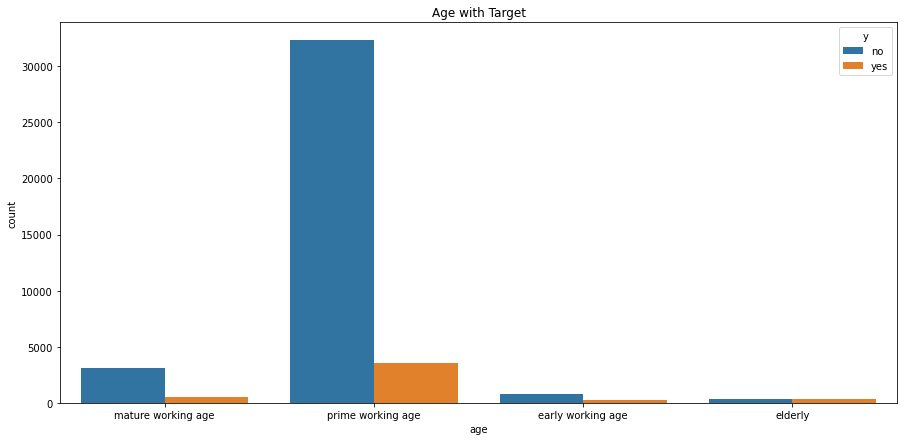

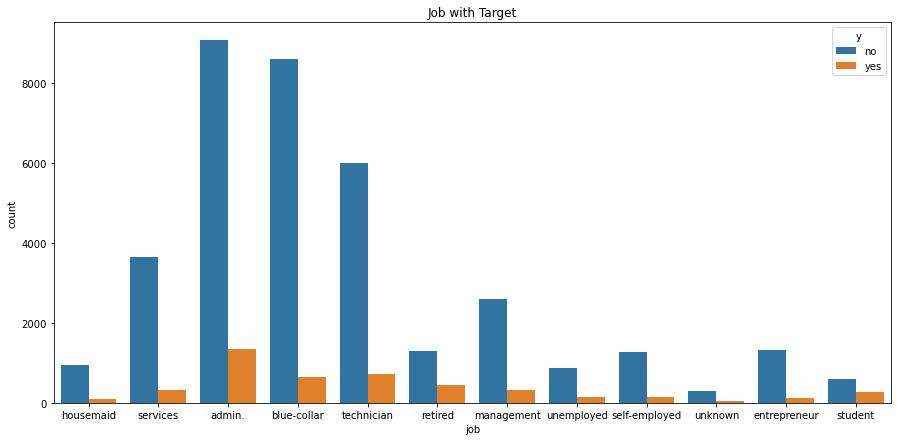

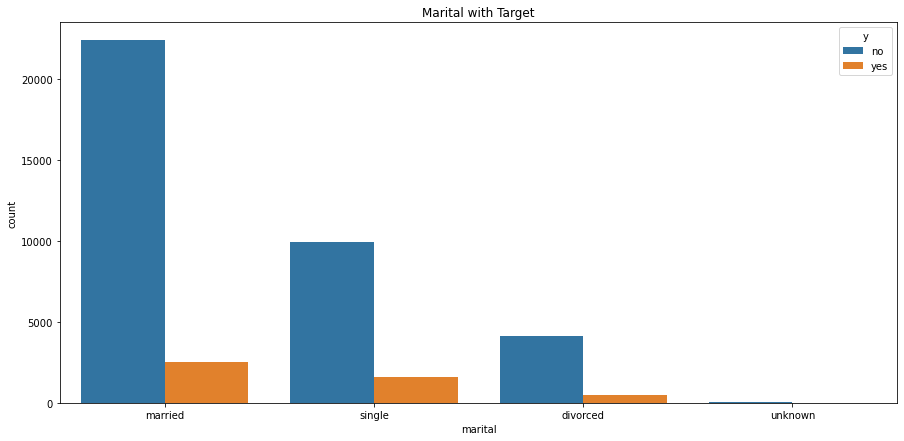

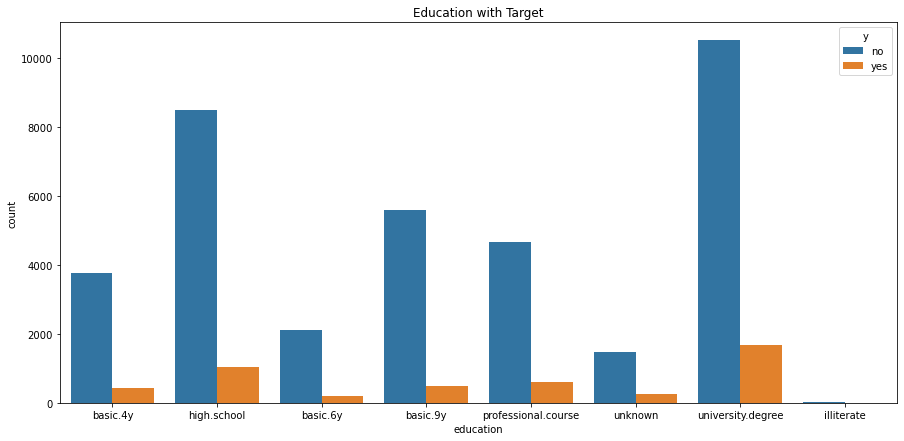

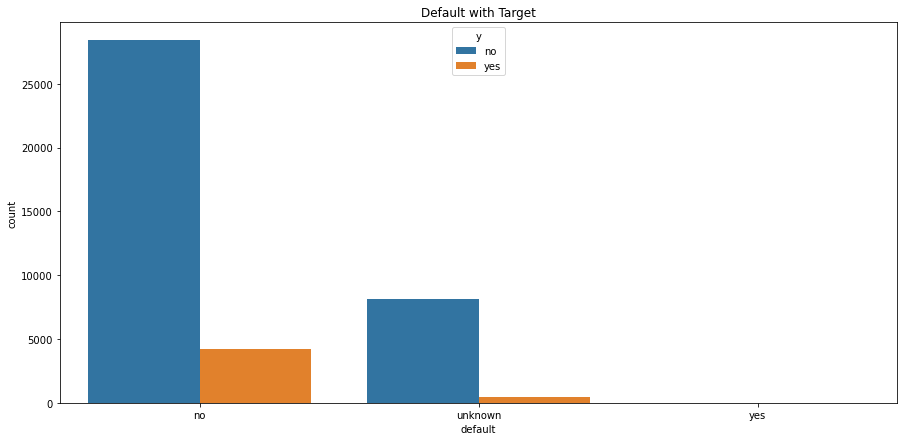

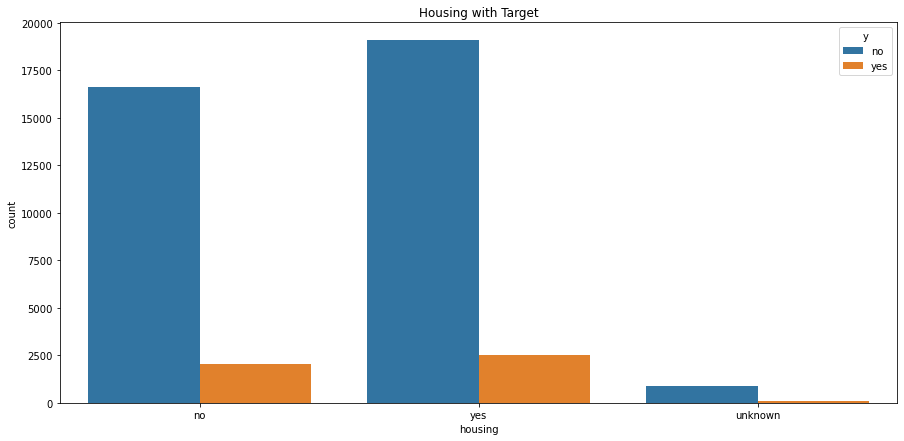

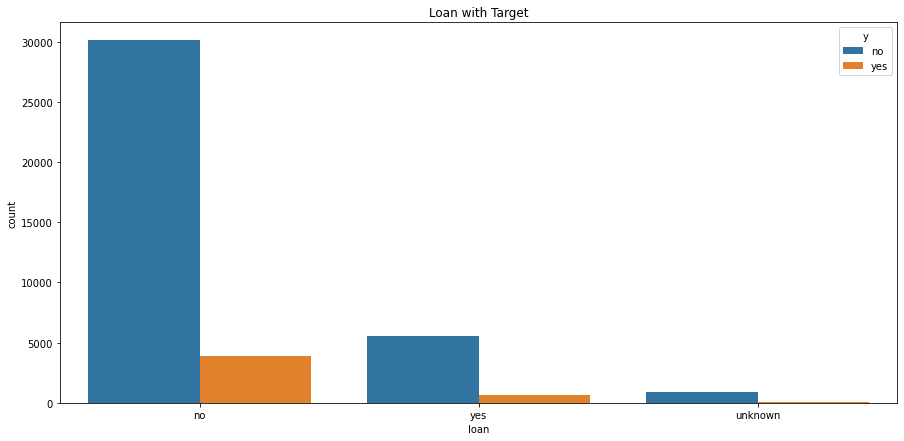

In [27]:
demo= ['age','job','marital','education','default','housing','loan']
for i in demo:
    plt.figure(figsize=(15,7))
    sns.countplot(data=data, x= i ,hue= 'y')
    plt.title(f'{i.capitalize()} with Target')
    plt.savefig(f'{i}-client.jpg')

In [21]:
for i in demo:
    print(f'{i.capitalize()} vs Target (Percentage yes & count)')
    print(pct_count(i))
    print('-'*50 + '\n')

Age vs Target (Percentage yes & count)
                    pct yes   yes     no  count
Unique                                         
elderly               47.21   313    350    663
early working age     23.97   256    812   1068
mature working age    13.57   484   3083   3567
prime working age      9.99  3587  32303  35890
--------------------------------------------------

Job vs Target (Percentage yes & count)
               pct yes   yes    no  count
Unique                                   
student          31.43   275   600    875
retired          25.23   434  1286   1720
unemployed       14.20   144   870   1014
admin.           12.97  1352  9070  10422
management       11.22   328  2596   2924
unknown          11.21    37   293    330
technician       10.83   730  6013   6743
self-employed    10.49   149  1272   1421
housemaid        10.00   106   954   1060
entrepreneur      8.52   124  1332   1456
services          8.14   323  3646   3969
blue-collar       6.89   638  8616  

In [22]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

**Kesimpulan:**
1. Client yang di telepon **mayoritas dari kelompok prime working age (25-54 tahun)**, dengan **persentase menempatkan uang di deposito terbesar yaitu dari kelompok umur elderly (65++ tahun)**. Kemungkinan terjadi **bias** karena jumlah kelompok elderly jauh lebih rendah dibanding kelompok umur lainnya. bisa dilihat dengan bertambah nya jumlah client, semakin kecil persentase kelompok

2. Client dengan **pekerjaan admin & technician merupakan yang terbanyak di telepon** dengan jumlah **target yes yang terbanyak** dibanding kelompok lain, secara persentase kedua pekerjaan tersebut cukup tinggi. Student & Retired memiliki persentase tertinggi kemungkinan karena ada nya **bias jumlah client yang sedikit**, atau kemungkinan yang lain **orang tua mendepositkan atas nama anaknya.**

3. Mayoritas client sudah menikah, dengan jumlah target yes terbanyak. Namun secara persentase, client dengan status single paling tinggi (kemungkinan karena belum ada tanggungan)

4. Dari segi pendidikan, terlihat bahwa ada kecenderungan **jika semakin tinggi pendidikan maka semakin tinggi juga persentase untuk mendepositkan uangnya (Kemungkinan karena literasi tentang keuangan lebih baik)**. Ada **sedikit bias** karena jumlah data, namun secara keseluruhan terlihat pola yang sama. 

5. Client dengan default hanya ada 3 (kemungkinan karena adanya peraturan untuk tidak menelpon client tsb).

6. Mayoritas client memiliki kredit pemilikan rumah dengan persentase target yes lebih besar dibanding yang tidak memiliki kredit.

7. Mayoritas client tidak memiliki hutang personal dan merupakan persentase target yes terbesar.

Secara keseluruhan, karena target data imbalance maka ada kecenderungan feature tidak mempengaruhi target secara signifikan.

**Apa faktor-faktor demographic yang mempengaruhi keputusan client?**
> **Tidak ada yang mempengaruhi secara signifikan**, namun faktor pendidikan memiliki pola bahwa semakin tinggi pendidikan persentase maka semakin tinggi juga persentase untuk mendepositkan uangnya (Kemungkinan karena literasi tentang keuangan lebih baik). ada pola juga di marital, age dan job

### 3. Apa faktor-faktor internal bank yang mempengaruhi keputusan client?

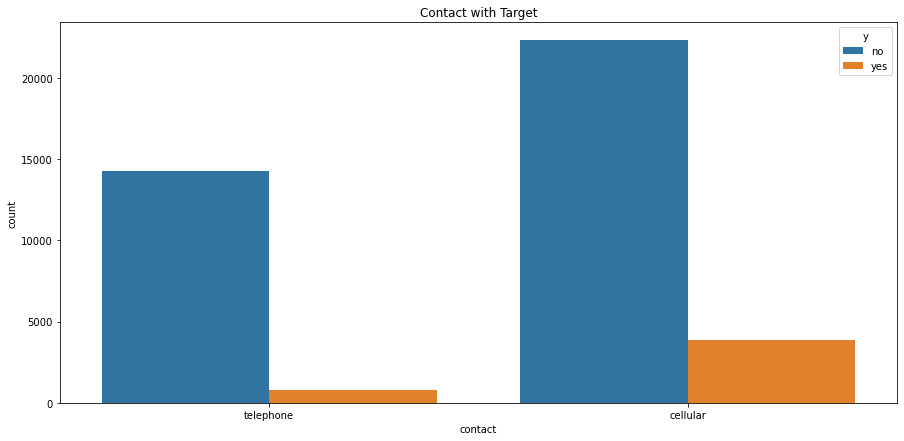

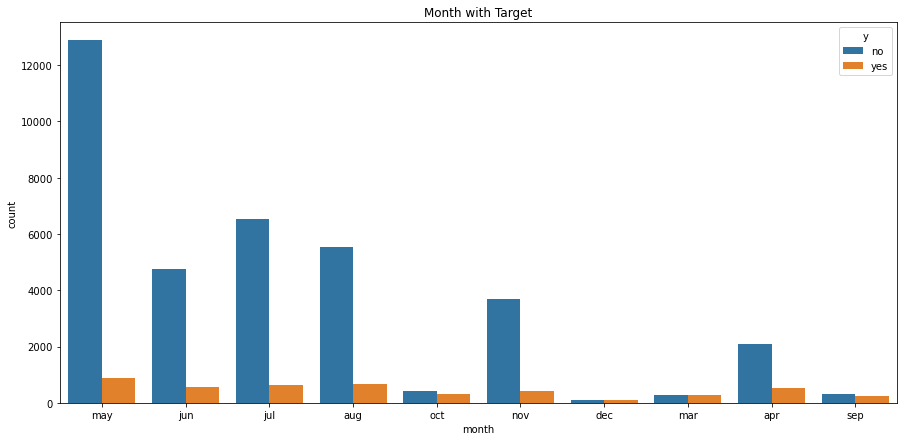

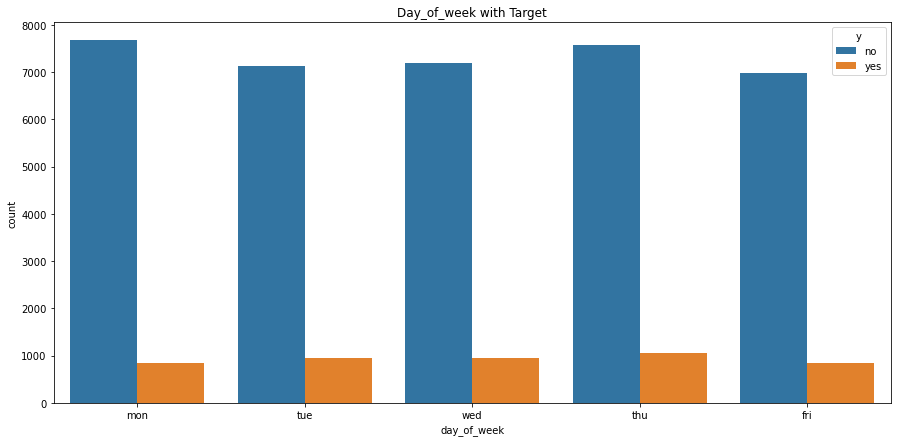

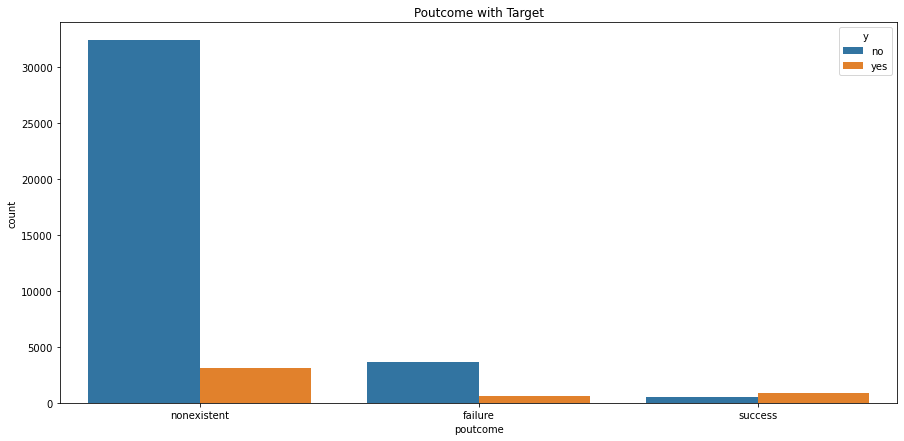

In [28]:
cat= ['contact','month','day_of_week','poutcome']
for i in cat:
    plt.figure(figsize=(15,7))
    sns.countplot(data=data, x= i ,hue= 'y')
    plt.title(f'{i.capitalize()} with Target')
    plt.savefig(f'{i}-internbank.jpg')

In [24]:
for i in cat:
    print(f'{i.capitalize()} vs Target (Percentage yes & count)')
    print(pct_count(i))
    print('-'*50 + '\n')

Contact vs Target (Percentage yes & count)
           pct yes   yes     no  count
Unique                                
cellular     14.74  3853  22291  26144
telephone     5.23   787  14257  15044
--------------------------------------------------

Month vs Target (Percentage yes & count)
        pct yes  yes     no  count
Unique                            
mar       50.55  276    270    546
dec       48.90   89     93    182
sep       44.91  256    314    570
oct       43.87  315    403    718
apr       20.48  539   2093   2632
aug       10.60  655   5523   6178
jun       10.51  559   4759   5318
nov       10.14  416   3685   4101
jul        9.05  649   6525   7174
may        6.43  886  12883  13769
--------------------------------------------------

Day_of_week vs Target (Percentage yes & count)
        pct yes   yes    no  count
Unique                            
thu       12.12  1045  7578   8623
tue       11.78   953  7137   8090
wed       11.67   949  7185   8134
fri       10.8

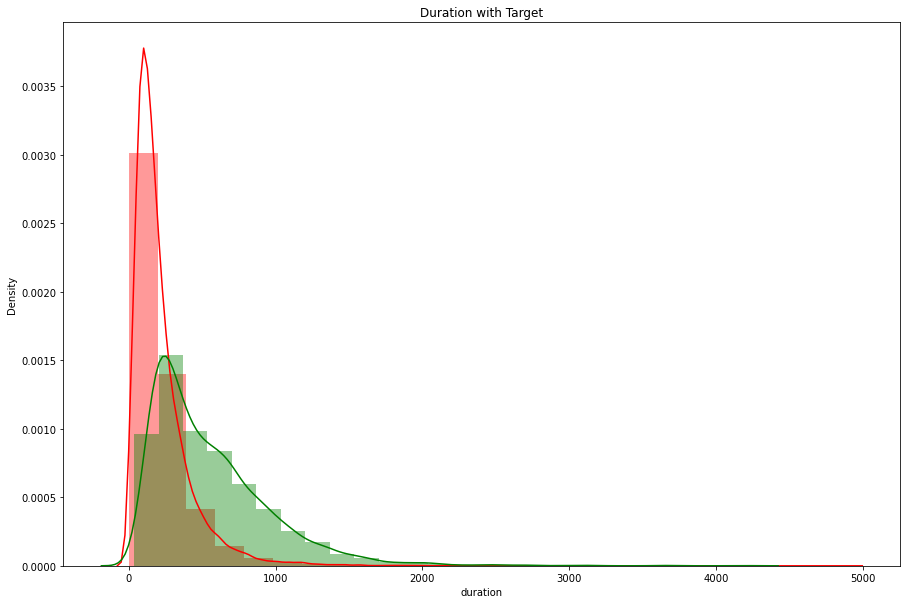

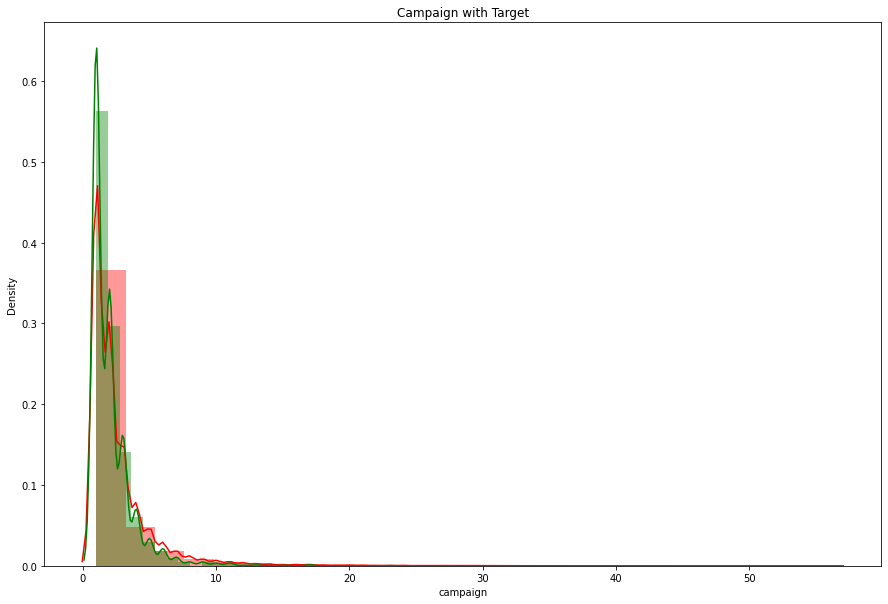

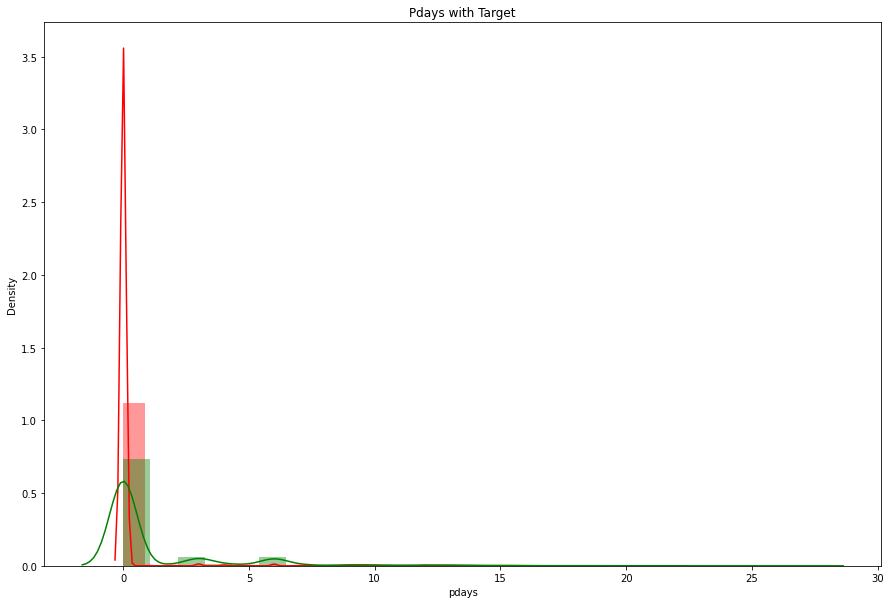

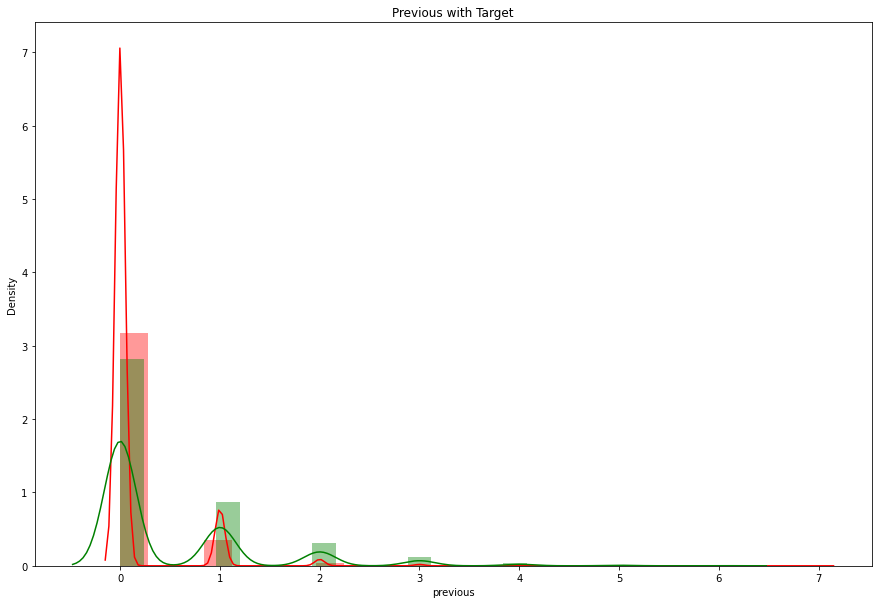

In [32]:
num= ['duration','campaign','pdays','previous']
for nf in num:
    plt.figure(figsize= (15,10))
    plt.title(f'{nf.capitalize()} with Target')
    sns.distplot(data[data['y']=='no'][nf], color= 'r', bins= 25)
    sns.distplot(data[data['y']=='yes'][nf], color= 'g', bins= 25)
    plt.savefig(f'{nf}-internbank.jpg')

In [27]:
for i in ['campaign','pdays','previous']:
    print(f'{i.capitalize()} vs Target (Percentage yes & count)')
    print(pct_count(i))
    print('-'*50 + '\n')

Campaign vs Target (Percentage yes & count)
        pct yes   yes     no  count
Unique                             
1         13.04  2300  15342  17642
2         11.46  1211   9359  10570
3         10.75   574   4767   5341
4          9.39   249   2402   2651
6          7.66    75    904    979
5          7.50   120   1479   1599
17         6.90     4     54     58
11         6.78    12    165    177
23         6.25     1     15     16
7          6.04    38    591    629
9          6.01    17    266    283
10         5.33    12    213    225
13         4.35     4     88     92
8          4.25    17    383    400
15         3.92     2     49     51
12         2.40     3    122    125
14         1.45     1     68     69
--------------------------------------------------

Pdays vs Target (Percentage yes & count)
        pct yes   yes     no  count
Unique                             
13        77.78    28      8     36
6         70.15   289    123    412
3         67.88   298    141    439

**Kesimpulan:**

1. Menelepon client menggunakan cellular lebih baik dibanding menggunakan telepon (????) **TIDAK DAPAT DIGUNAKAN SAAT MODELING KARENA BELUM TELEPON**
2. bulan Maret, April, September, October dan Desember memiliki persentase yang tinggi namun ada kemungkinan bias karena jumlah client yang di telepon sedikit. **TIDAK DAPAT DIGUNAKAN SAAT MODELING KARENA BELUM TELEPON**
3. tidak ada perbedaan yang signifikan untuk hari **TIDAK DAPAT DIGUNAKAN SAAT MODELING KARENA BELUM TELEPON**
4. Jika outcome campaign sebelumnya sukses, persentase client tersebut medepositkan uang nya lebih tinggi (meskipun ada kemungkinan bias karena jumlah client yang sedikit) namun ada kecenderungan client lebih banyak yang menerima dibanding menolak. (poutcome sangat subjektif, karena parameter sukses atau gagal tidak di jelaskan)
5. dari plot Duration bisa dilihat, semakin lama Duration semakin banyak yang medepositkan uang nya. **TIDAK DAPAT DIGUNAKAN SAAT MODELING KARENA BELUM TELEPON**
6. Semakin sedikit client dihubungi disaat campaign, semakin tinggi kemungkinan client mendepositkan uangnya. (1-6 kali di telepon)
6. Semakin banyak client dihubungi dicampaign sebelumnya, semakin tinggi kemungkinan client medepositkan uangnya.

**Apa faktor-faktor internal bank yang mempengaruhi keputusan client?**
> Beberapa faktor cukup mempengaruhi keputusan client, seperti bulan ditelepon, outcome, dan durasi. 

Bank dapat melakukan beberapa hal untuk mempengaruhi keputusan client seperti:
>* Untuk campaign selanjutnya, bank dapat menambah jumlah client yang dihubungi di bulan Maret, April, September, October dan Desember karena persentase di bulan tersebut cukup tinggi
>* Perusahaan dapat mengadakan training untuk telemarketer, agar outcome campaign bisa meningkat(lebih banyak yang sukses)
>* Sebisa mungkin telemarketer dapat membuat percakapan yang lebih menarik, karena durasi saat menelepon sangat menentukan keputusan client

### 4. Apa faktor-faktor eksternal bank yang mempengaruhi keputusan client?

In [25]:
data['cons.conf.idx']= data['cons.conf.idx']*-1

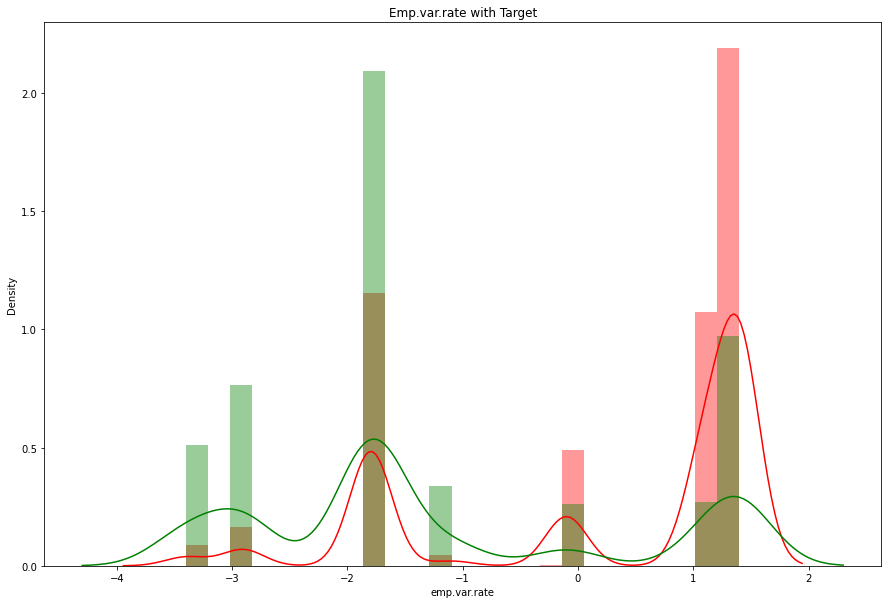

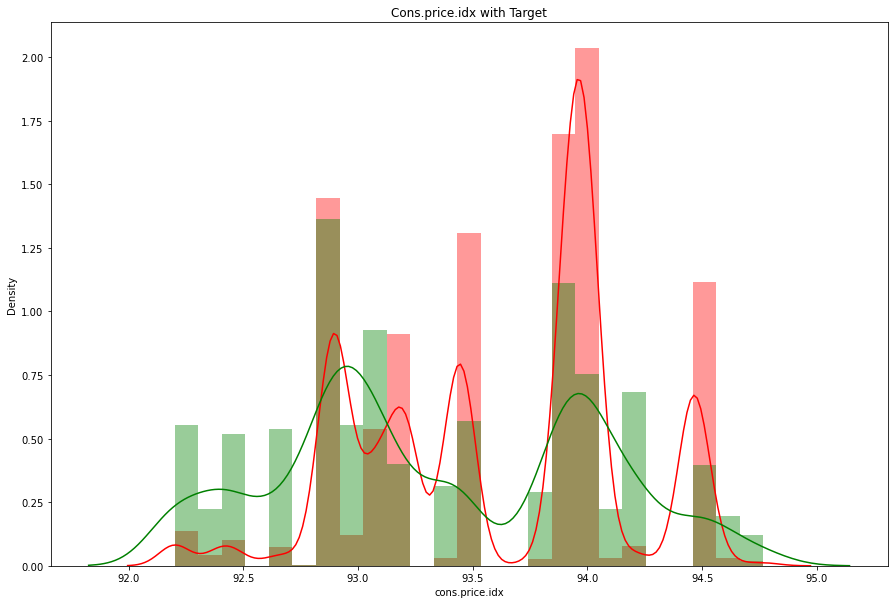

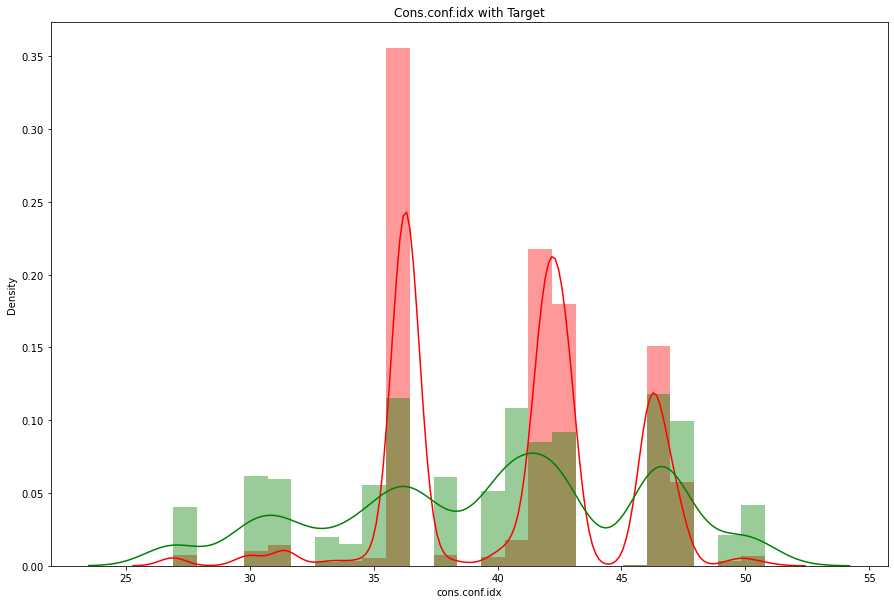

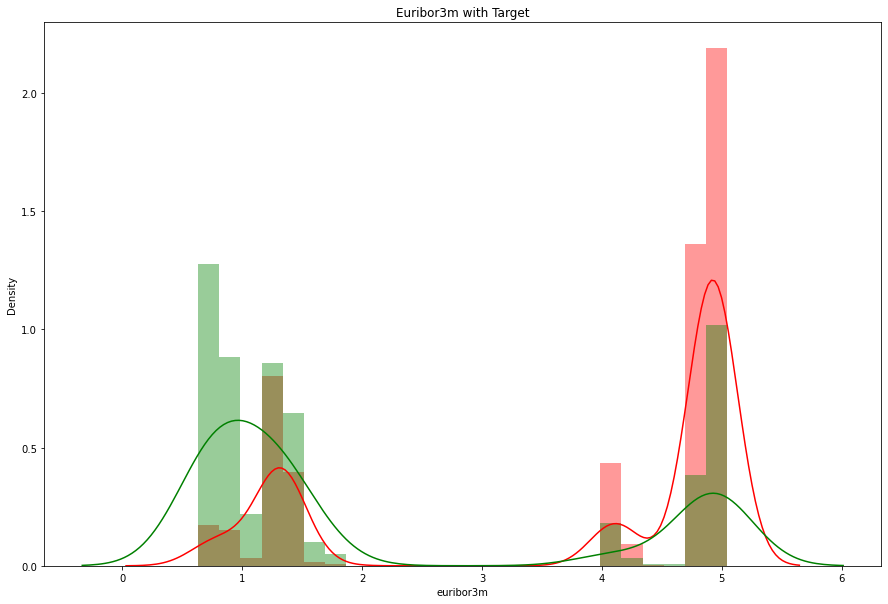

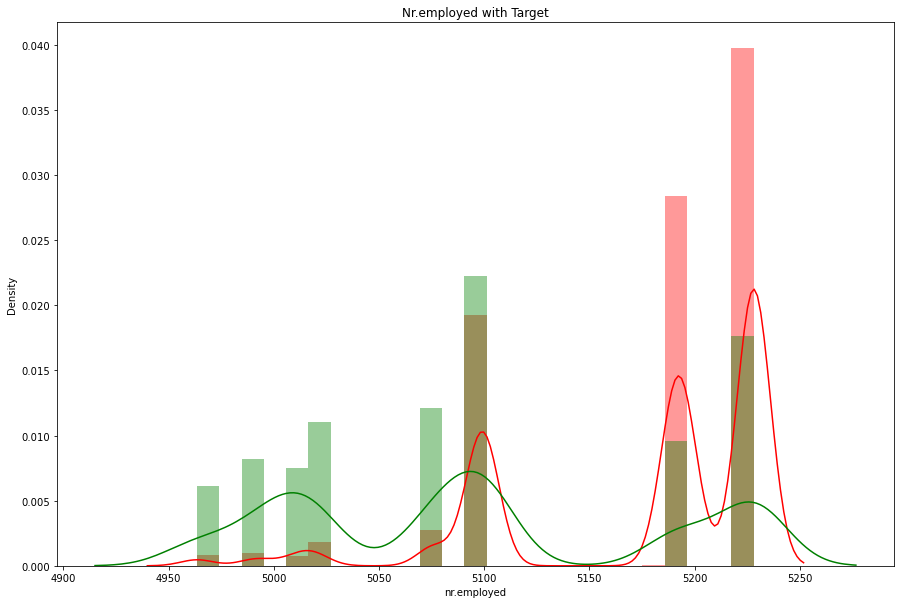

In [33]:
for nf in ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']:
    plt.figure(figsize= (15,10))
    plt.title(f'{nf.capitalize()} with Target')
    sns.distplot(data[data['y']=='no'][nf], color= 'r', bins= 25)
    sns.distplot(data[data['y']=='yes'][nf], color= 'g', bins= 25)
    plt.savefig(f'{nf}-externbank.jpg')

* emp.var.rate (employment variation rate - quarterly): 
> selisih per quarter employment rate. employment rate adalah rasio jumlah pekerja dibagi jumlah populasi yang sudah siap bekerja (15 tahun keatas)
* cons.price.idx (consumer price index - monthly):
> index perubahan harga rata-rata di kalangan konsumen pada beberapa jenis produk barang dan jasa tertentu. Jika CPI nya adalah 110, maka ada peningkatan harga rata-rata sebanyak 10%, dan jika nilai CPI yang 90, berarti ada penurunan harga rata-rata sebanyak 10%.
* cons.conf.idx (consumer confidence index - monthly):
> indikator ekonomi yang dirancang untuk mengukur optimisme atau pesimisme konsumen terhadap kondisi perekonomian suatu negara. **data harus positive.**
* euribor3m (euro interbank offered rate 3 month):
> rate suku bunga antar bank yang dipersiapkan bank-bank Eropa untuk dipinjamkan satu sama lain selama 3 bulan. Ketika suku bunga Euribor naik atau turun (secara substansial) ada kemungkinan besar bahwa suku bunga pada produk perbankan seperti hipotek, rekening tabungan dan pinjaman juga akan diadjust. 

untuk lebih mengerti tentang interbank offered rate: https://www.youtube.com/watch?v=wBCowBiXV7A <- contoh LIBOR (london interbank offered rate)
* nr.employed *kemungkinan dalam ribuan* (number of employed - quarterly):
> jumlah warga portugal yang bekerja


### Reference:
- employment rate
> https://data.oecd.org/emp/employment-rate.htm#:~:text=Employment%20rates%20are%20defined%20as,to%20the%20working%20age%20population.&text=The%20working%20age%20population%20refers%20to%20people%20aged%2015%20to%2064.
- consumer price index
>* https://www.bls.gov/cpi/questions-and-answers.htm#:~:text=The%20Consumer%20Price%20Index%20(CPI,of%20consumer%20goods%20and%20services.
>* https://accurate.id/akuntansi/consumer-price-index-adalah/
- consumer confidence index
> https://www.investopedia.com/insights/understanding-consumer-confidence-index/
- euro interbank offered rate 3 month
>* https://www.global-rates.com/en/interest-rates/euribor/euribor-interest-3-months.aspx
>* untuk lebih mengerti tentang interbank offered rate: https://www.youtube.com/watch?v=wBCowBiXV7A <- contoh LIBOR (london interbank offered rate)
- number of employed
>* https://tradingeconomics.com/portugal/employed-persons

- ekonomi
>* https://www.cermati.com/artikel/pengertian-deflasi-penyebab-dan-cara-mengatasinya
>* https://www.investopedia.com/terms/d/deflation.asp
>* https://www.investopedia.com/terms/m/monetarypolicy.asp

**Kesimpulan:**
1. Terlihat ketika **employment variation rate negatif, ada kecenderungan client mendepositkan uangnya dan sebaliknya.** Efek dari employment rate yang turun adalah dapat membuat market menjadi **pesimis (kemampuan masyarakat untuk belanja jadi turun)** dan memilih untuk **menabung atau menginvestasikan uangnya** ke instrumen keuangan seperti deposito, obligasi, saham, dll.

2. ketika terjadi **penurunan consumer price index, persentase client yang mendepositkan uangnya meningkat.** Menurut https://www.investopedia.com/ dan https://finata.id/, jika consumer price index menurun, ada kecenderungan terjadinya **deflasi** yang dimana mengakibatkan **nilai mata uang jadi menguat, dan kesadaran kita sebagai masyarakat untuk menabung semakin meningkat.**

3. Semakin pesimis market, ada kecenderungan persentase client mendepositkan uang nya meningkat. <- berhubungan dengan penjelasan di employment variation rate

4. Terlihat jelas saat **euribor kecil, ada kecenderungan client mendepositkan uang nya.** Menurut https://media.neliti.com/media/publications/112844-ID-none.pdf, sebagai contoh, semakin tinggi suku bunga JIBOR *(Jakarta Interbank Offered Rate)* menyebabkan keinginan investor untuk melakukan investasi di bentuk investasi lain semakin kecil. Sebaliknya makin rendah suku bunga maka investor akan terdorong untuk melakukan investasi di bentuk lain, termasuk reksadana. Jadi makin rendah suku bunga akan meningkatkan permintaan terhadap reksadana, yang berarti semakin tinggi kinerja reksadana.

5. Saat jumlah pekerja menurun, ada kecenderungan client mendepositkan uangnya dan sebaliknya. <- berhubungan dengan penjelasan di employment variation rate

**Apa faktor-faktor eksternal bank yang mempengaruhi keputusan client?**
> Hampir seluruh faktor eksternal bank **memiliki pengaruh yang cukup signifikan** terhadap keputusan client.

### 5. Apakah ada kondisi ideal seseorang untuk menempatkan uangnya di deposito berjangka?

Jika bank ingin meningkatkan keefektifan dan hasil. Bank dapat melakukan hal-hal dibawah ini,

Kondisi terbagi menjadi 3, yaitu:
1. Client
>* Elderly & Early Working Age merupakan kelompok umur dengan persentase terbesar. Bank dapat menambah jumlah client yang ditelepon di kelompok umur tesebut.
>* Student & retired merupakan pekerjaan dengan persentase terbesar. Bank dapat menambah jumlah client yang ditelepon di kelompok tesebut.
>* Client yang berstatus single memiliki persentase terbesar. Bank dapat menambah jumlah client yang ditelepon di kelompok tesebut.
>* Bank dapat menawarkan lebih banyak ke client dengan pendidikan yang lebih tinggi.
>* Jika ingin lebih efektif, bank dapat memilih client yang memiliki hutang cicilan rumah dan tidak memiliki hutang personal (meskipun tidak terlalu signifikan perbedaan nya)

2. Internal Bank
>* Untuk campaign selanjutnya, bank dapat menambah jumlah client yang dihubungi di bulan Maret, April, September, October dan Desember karena persentase di bulan tersebut cukup tinggi
>* Perusahaan dapat mengadakan training untuk telemarketer, agar outcome campaign bisa meningkat(lebih banyak yang sukses)
>* Sebisa mungkin telemarketer dapat membuat percakapan yang lebih menarik, karena durasi saat menelepon sangat menentukan keputusan client

3. Eksternal Bank
> Meskipun pengaruh eksternal bank terhadap keputusan client tinggi. Secara ekonomi, bank tidak bisa memilih melakukan hal-hal yang diinginkan karena diatur oleh bank central dan pemerintah. Contoh: saat terjadi deflasi dan market pesimis, banyak orang yang berinvestasi, secara bisnis kondisi tersebut adalah waktu yang tepat untuk menawarkan marketing campaign bank. Namun pemerintah akan mengeluarkan kebijakan moneter seperti bank central meminta semua bank untuk mengurangi suku bunga bank dll dengan tujuan mendorong masyarakat untuk menjajankan uangnya, ketimbang hanya membiarkannya di bank.

***n.b. semua rekomendasi diatas berdasarkan EDA sesuai dengan data, jika ada hal-hal yang berlawan dengan logika kemungkinan ada bias yang terjadi di data.***